<a href="https://colab.research.google.com/github/codingmaniac1214/Hermes-world/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("plotrix")
install.packages("gridExtra")
install.packages("NbClust")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [2]:
customer_data=read.csv("/content/Mall_Customers.csv")
str(customer_data)

'data.frame':	400 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Gender                : chr  "Male" "Male" "Female" "Female" ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [3]:
names(customer_data)

[1] "CustomerID"             "Gender"                 "Age"                   
[4] "Annual.Income..k.."     "Spending.Score..1.100."

In [4]:
head(customer_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


In [5]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [6]:
sd(customer_data$Age)

[1] 13.95149

In [7]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

In [8]:
sd(customer_data$Annual.Income..k..)

[1] 26.23179

In [9]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

In [10]:
sd(customer_data$Spending.Score..1.100.)

[1] 25.79114

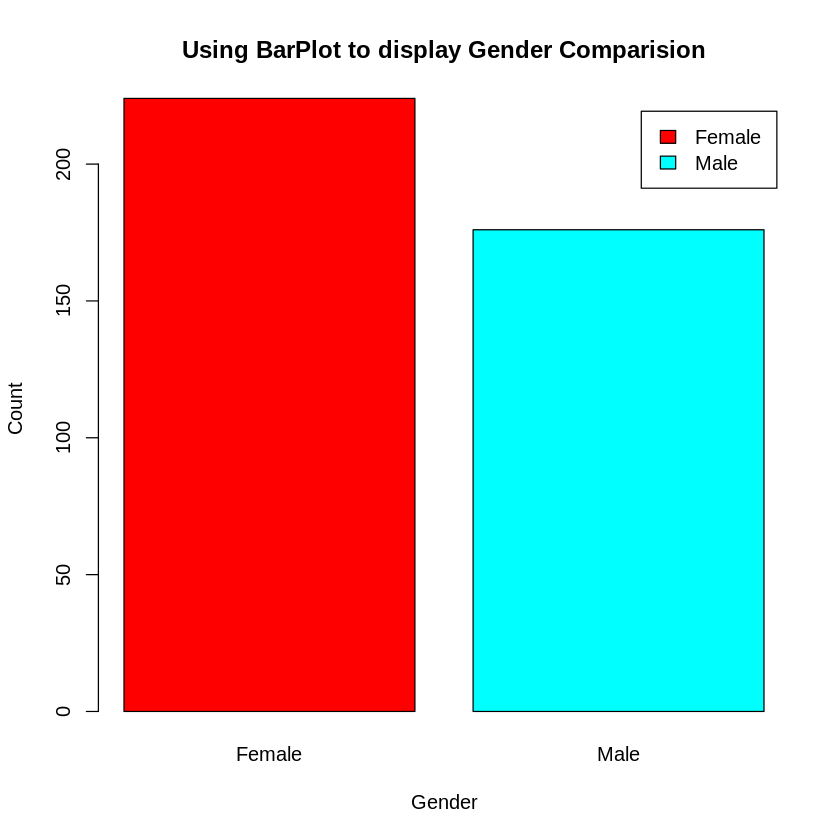

In [11]:
a=table(customer_data$Gender)
barplot(a,main="Using BarPlot to display Gender Comparision",
        ylab="Count",
        xlab="Gender",
        col=rainbow(2),
        legend=rownames(a))

In [12]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)

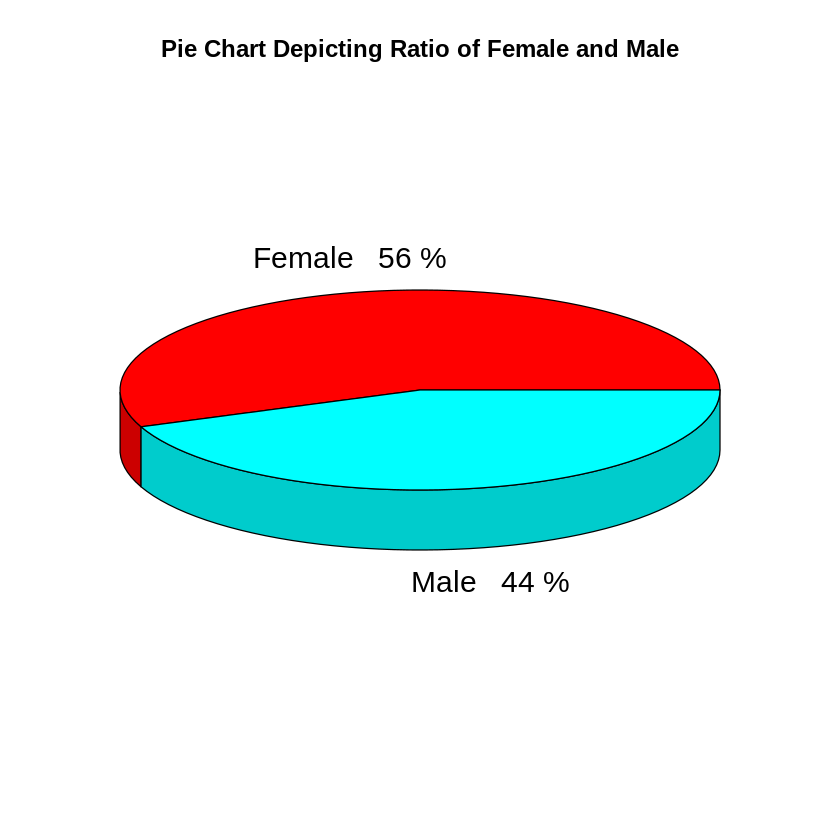

In [13]:
pie3D(a,labels=lbs,
      main="Pie Chart Depicting Ratio of Female and Male")

In [14]:
summary(customer_data$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

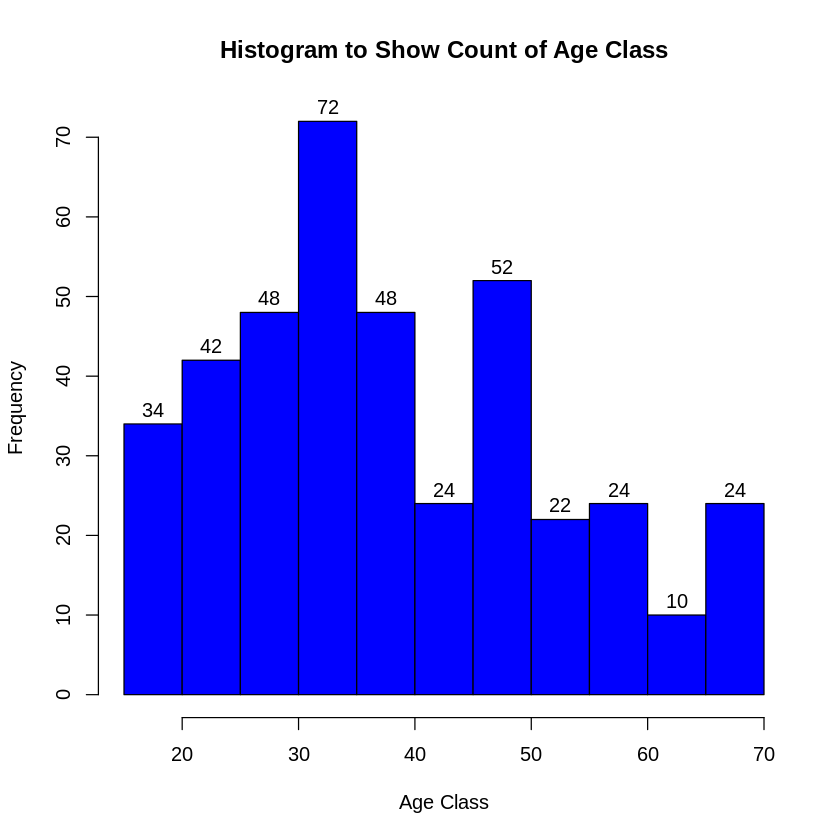

In [15]:
hist(customer_data$Age,
     col="blue",
     main="Histogram to Show Count of Age Class",
     xlab="Age Class",
     ylab="Frequency",
     labels=TRUE)

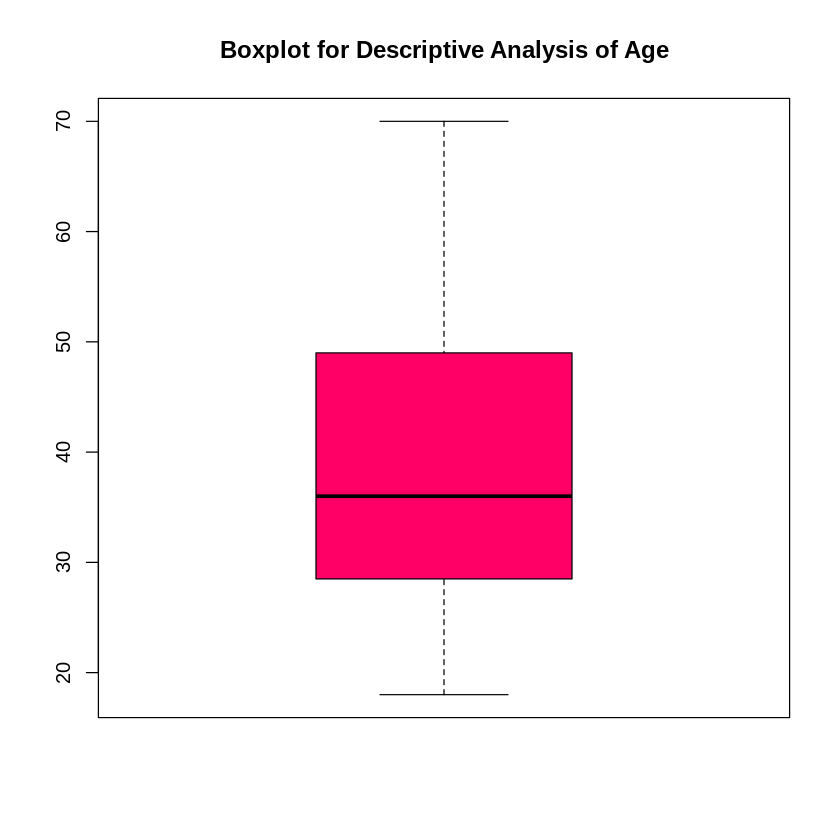

In [16]:
boxplot(customer_data$Age,
        col="#ff0066",
        main="Boxplot for Descriptive Analysis of Age")

In [17]:
summary(customer_data$Annual.Income..k..)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

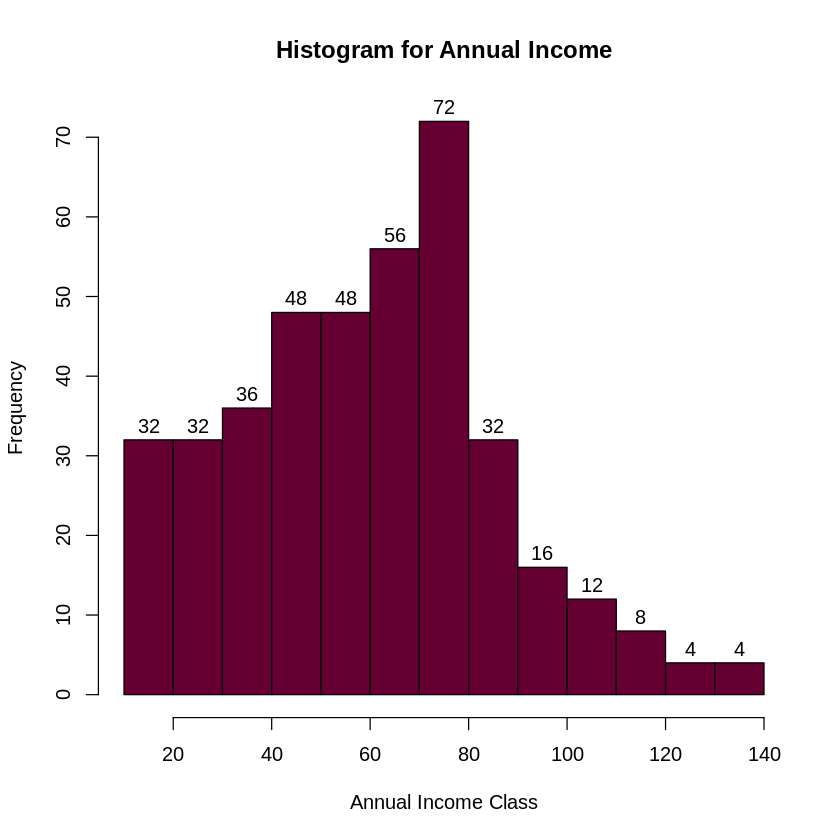

In [18]:
hist(customer_data$Annual.Income..k..,
     col="#660033",
     main="Histogram for Annual Income",
     xlab="Annual Income Class",
     ylab="Frequency",
     labels=TRUE)

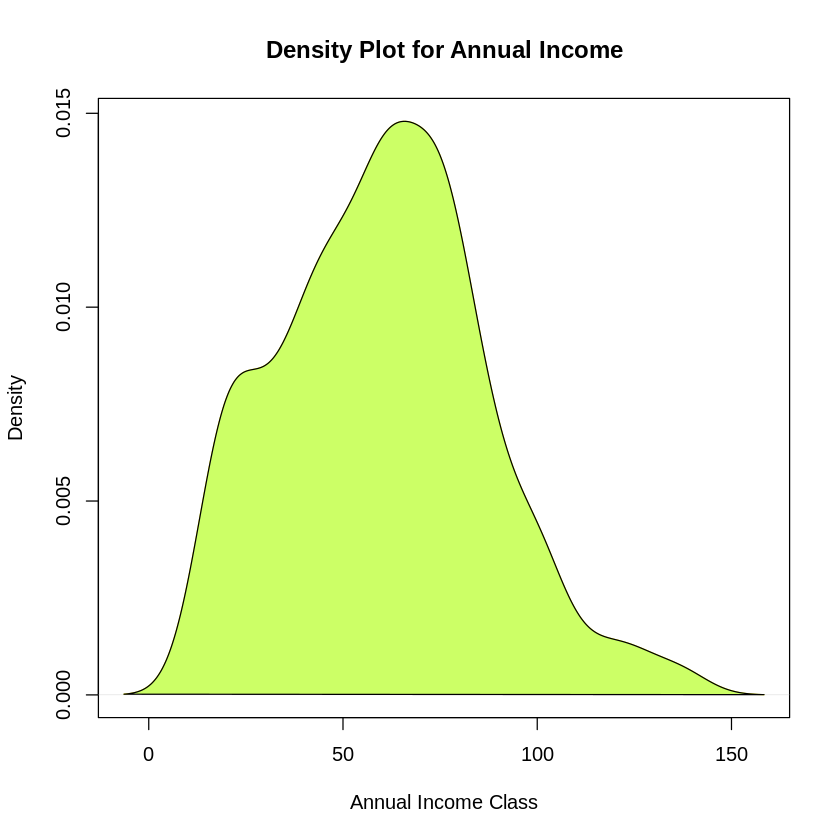

In [22]:
plot(density(customer_data$Annual.Income..k..),
     col="yellow",
     main="Density Plot for Annual Income",
     xlab="Annual Income Class",
     ylab="Density")
polygon(density(customer_data$Annual.Income..k..),
        col="#ccff66")

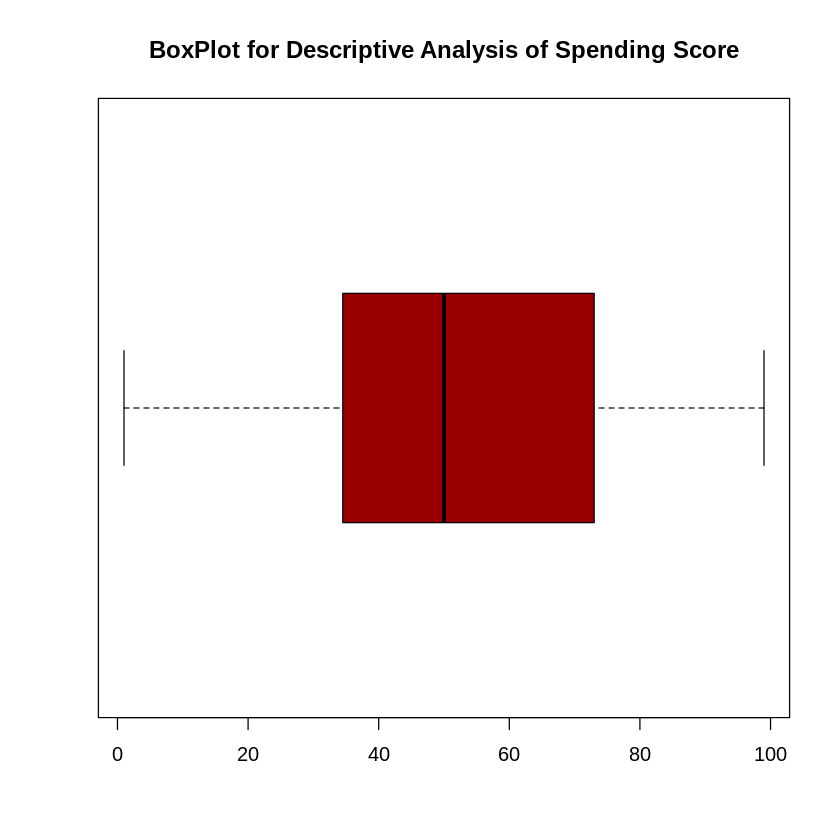

In [23]:
boxplot(customer_data$Spending.Score..1.100.,
        horizontal=TRUE,
        col="#990000",
        main="BoxPlot for Descriptive Analysis of Spending Score")

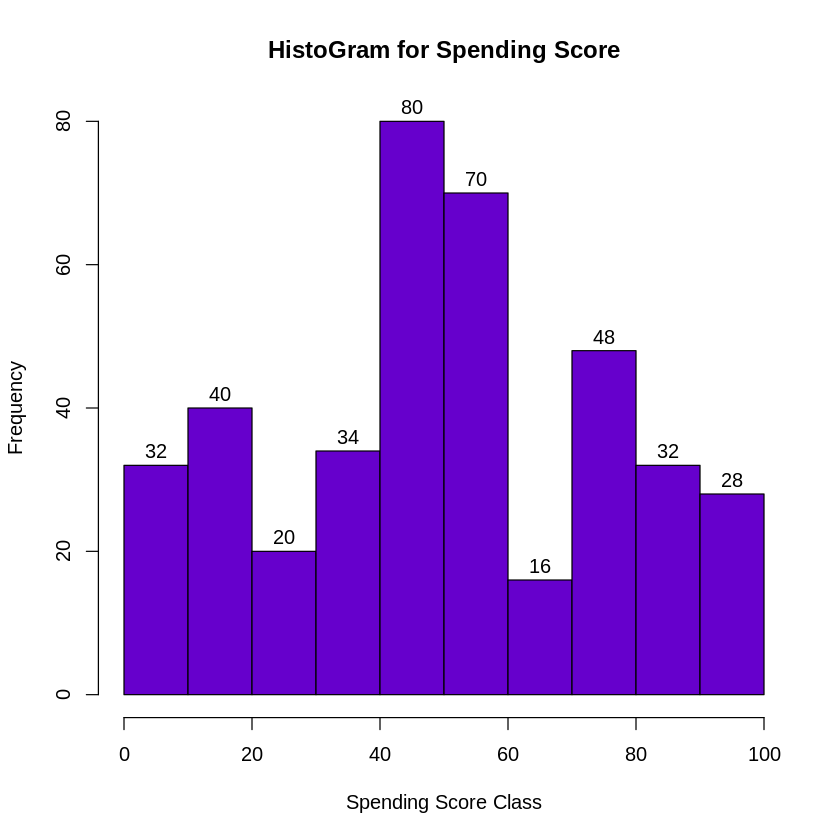

In [24]:
hist(customer_data$Spending.Score..1.100.,
     main="HistoGram for Spending Score",
     xlab="Spending Score Class",
     ylab="Frequency",
     col="#6600cc",
     labels=TRUE)

In [25]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square
iss <- function(k) {
  kmeans(customer_data[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}

k.values <- 1:10


iss_values <- map_dbl(k.values, iss)

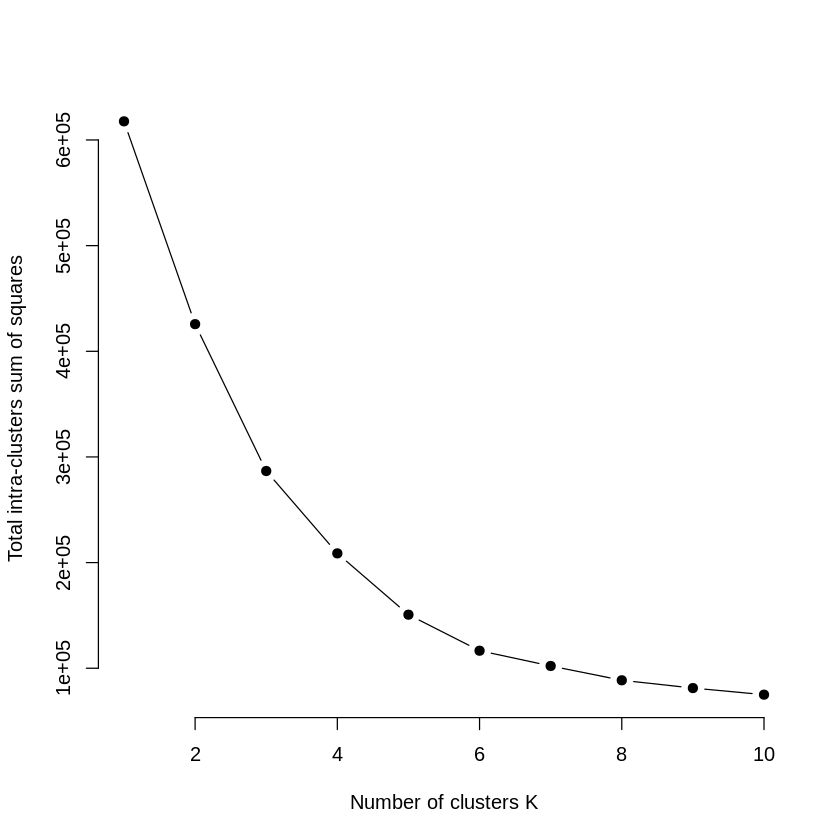

In [26]:
plot(k.values, iss_values,
     type="b", pch = 19, frame = FALSE,
     xlab="Number of clusters K",
     ylab="Total intra-clusters sum of squares")

In [27]:
library(cluster)

In [28]:
library(gridExtra)

In [29]:
library(grid)

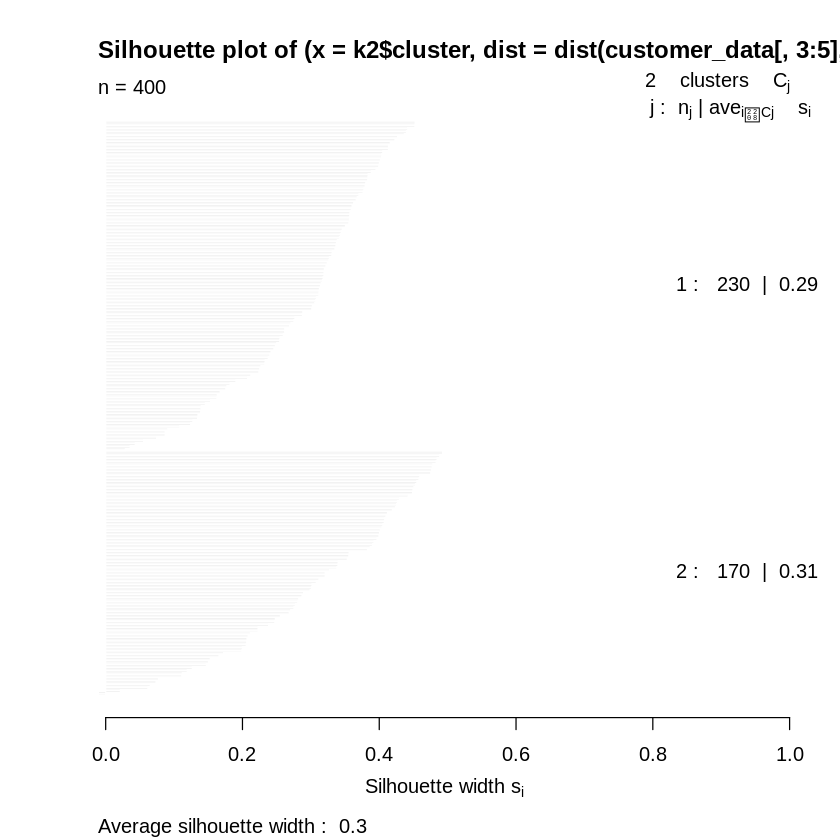

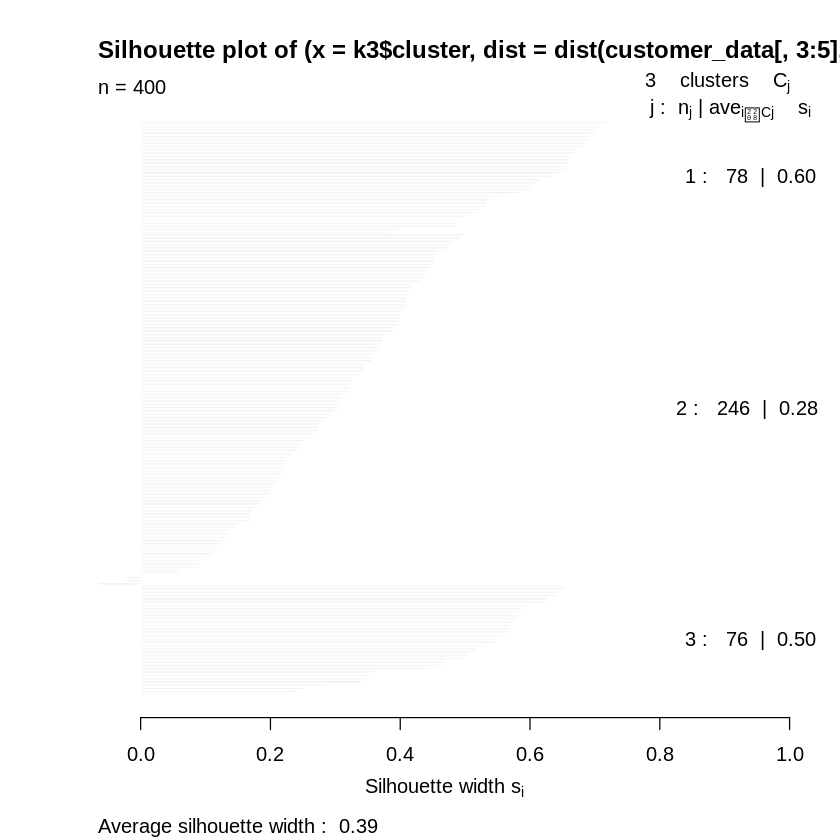

In [33]:
k2<-kmeans(customer_data[,3:5],2,iter.max=100,nstart=50,algorithm="Lloyd")
s2<-plot(silhouette(k2$cluster,dist(customer_data[,3:5],"euclidean")))

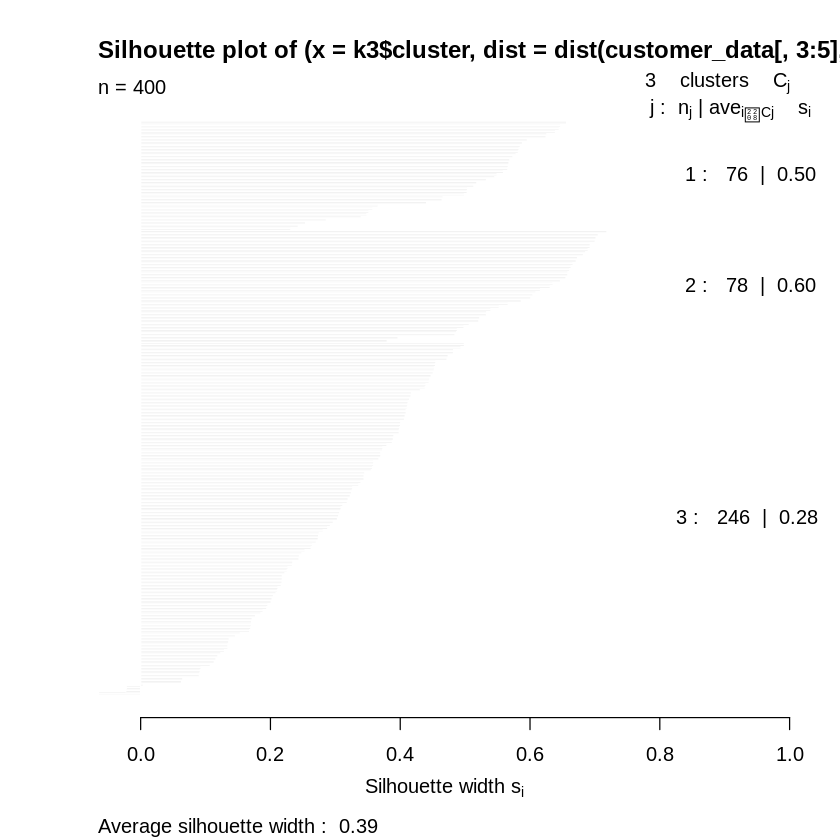

In [34]:
k3<-kmeans(customer_data[,3:5],3,iter.max=100,nstart=50,algorithm="Lloyd")
s3<-plot(silhouette(k3$cluster,dist(customer_data[,3:5],"euclidean")))

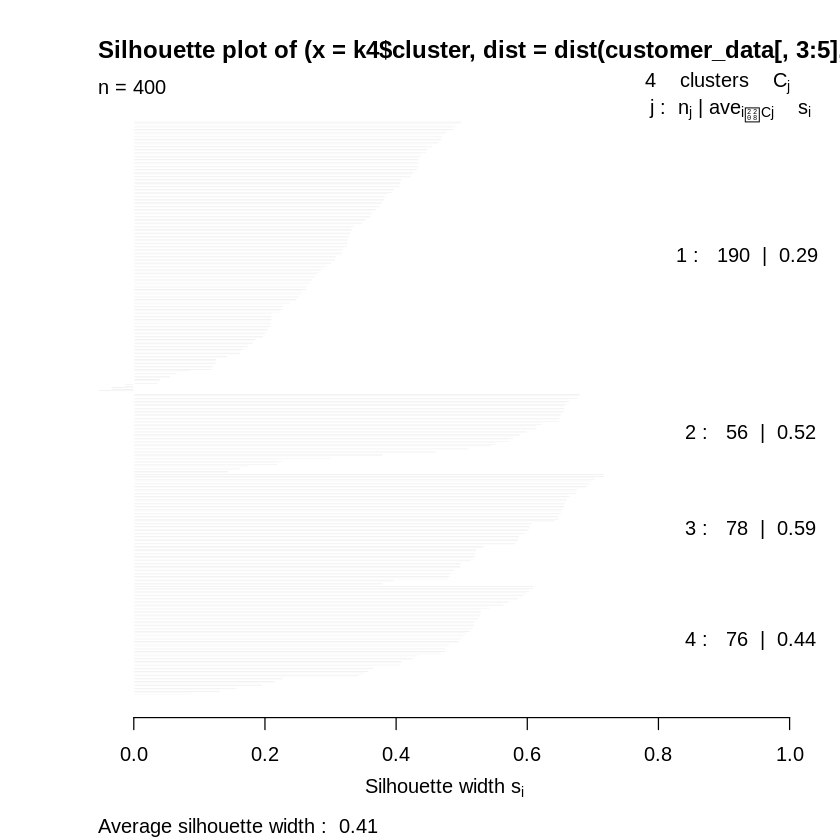

In [35]:
k4<-kmeans(customer_data[,3:5],4,iter.max=100,nstart=50,algorithm="Lloyd")
s4<-plot(silhouette(k4$cluster,dist(customer_data[,3:5],"euclidean")))

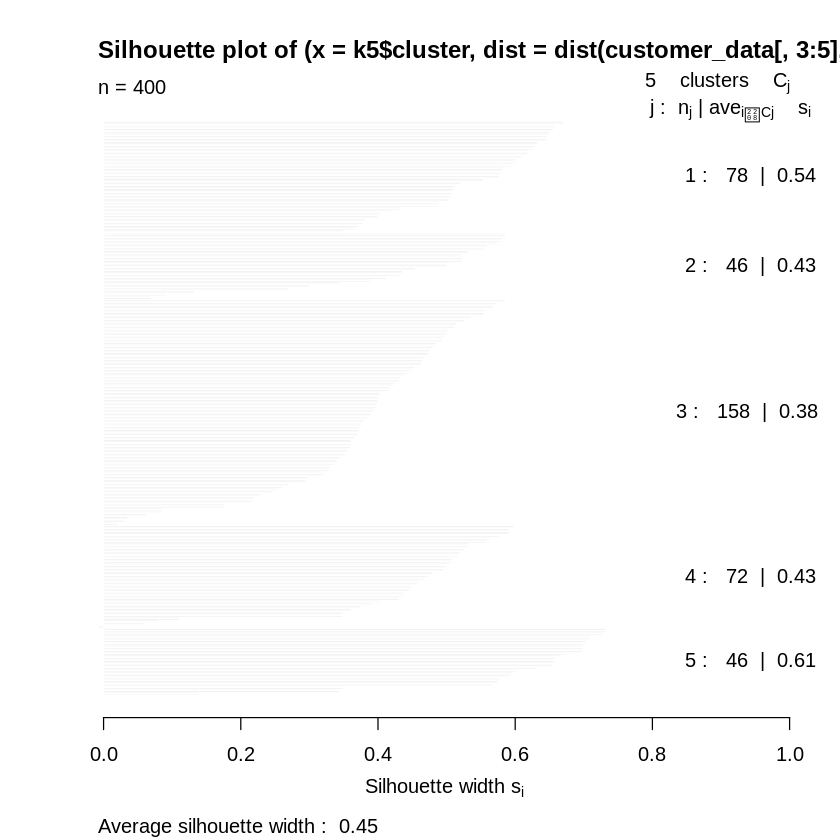

In [36]:
k5<-kmeans(customer_data[,3:5],5,iter.max=100,nstart=50,algorithm="Lloyd")
s5<-plot(silhouette(k5$cluster,dist(customer_data[,3:5],"euclidean")))

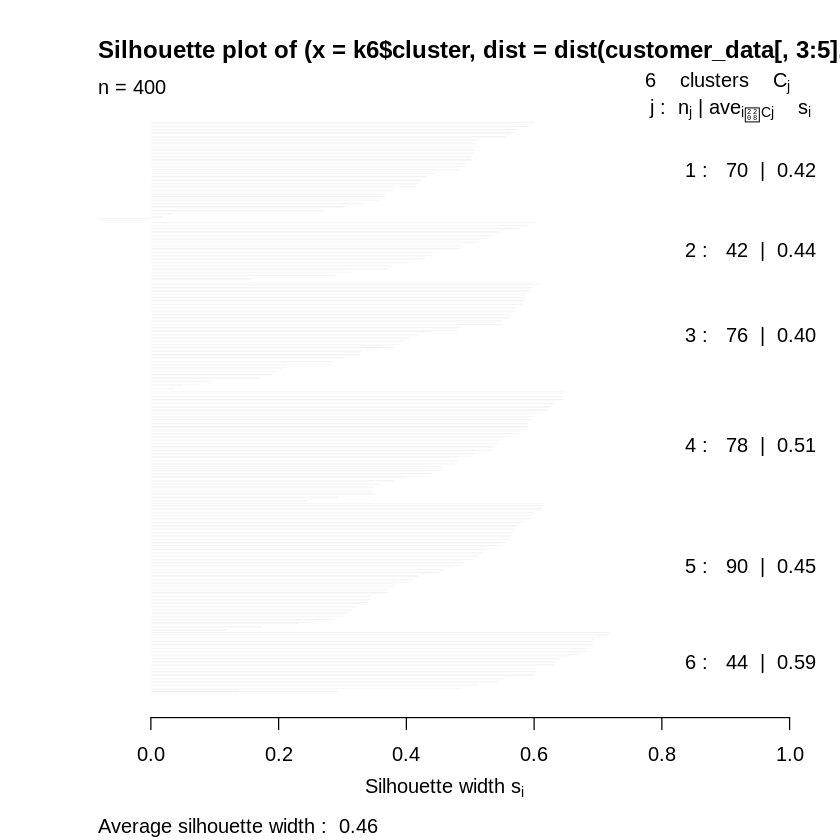

In [37]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
s6<-plot(silhouette(k6$cluster,dist(customer_data[,3:5],"euclidean")))


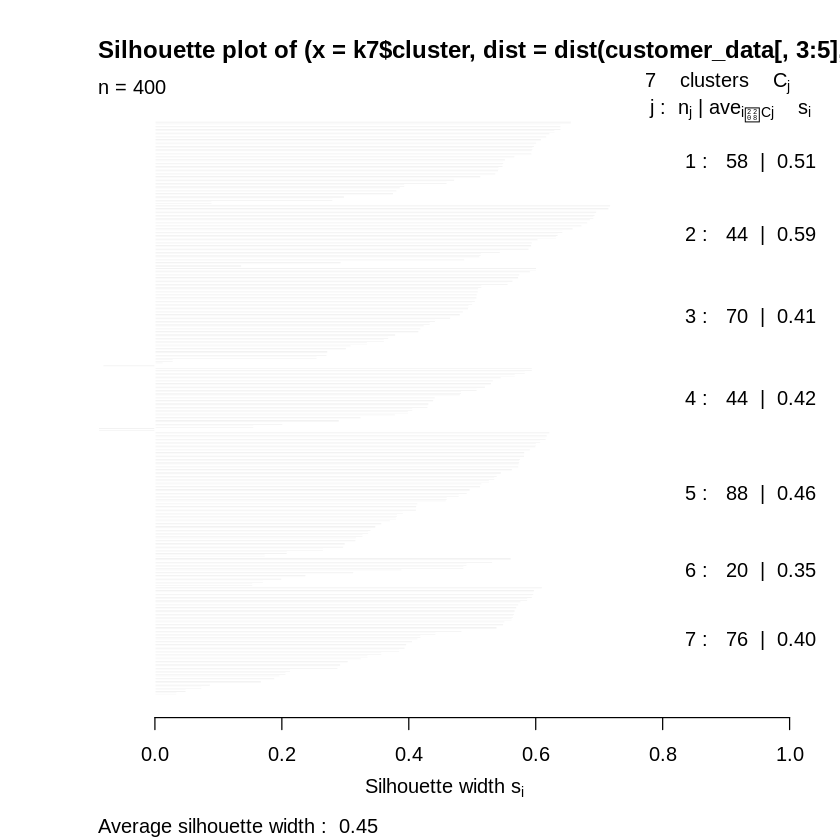

In [38]:
k7<-kmeans(customer_data[,3:5],7,iter.max=100,nstart=50,algorithm="Lloyd")
s7<-plot(silhouette(k7$cluster,dist(customer_data[,3:5],"euclidean")))

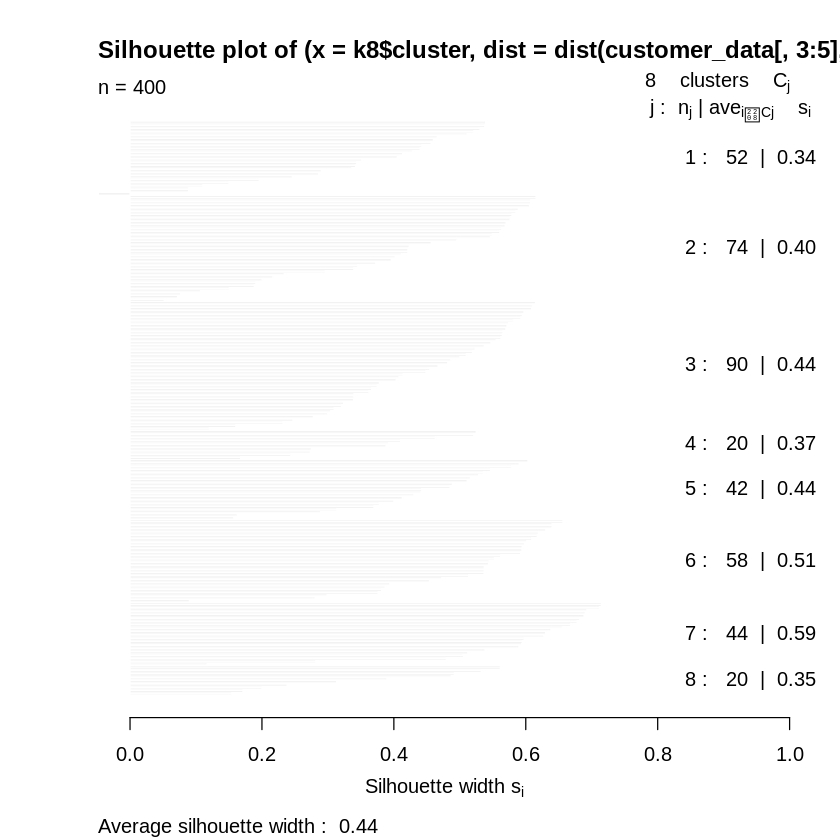

In [39]:
k8<-kmeans(customer_data[,3:5],8,iter.max=100,nstart=50,algorithm="Lloyd")
s8<-plot(silhouette(k8$cluster,dist(customer_data[,3:5],"euclidean")))

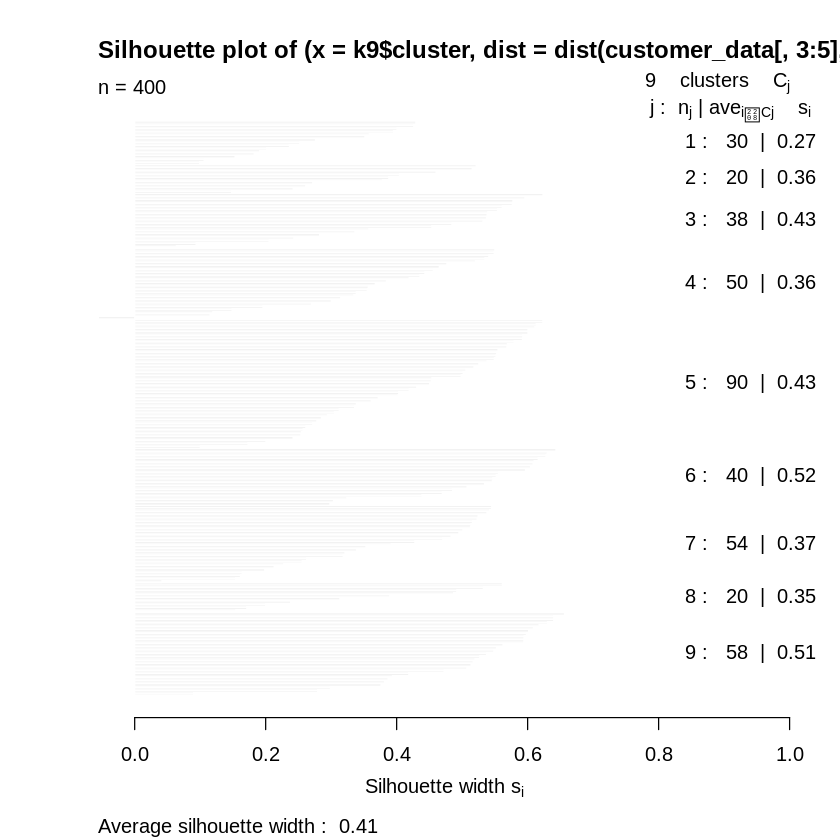

In [40]:
k9<-kmeans(customer_data[,3:5],9,iter.max=100,nstart=50,algorithm="Lloyd")
s9<-plot(silhouette(k9$cluster,dist(customer_data[,3:5],"euclidean")))

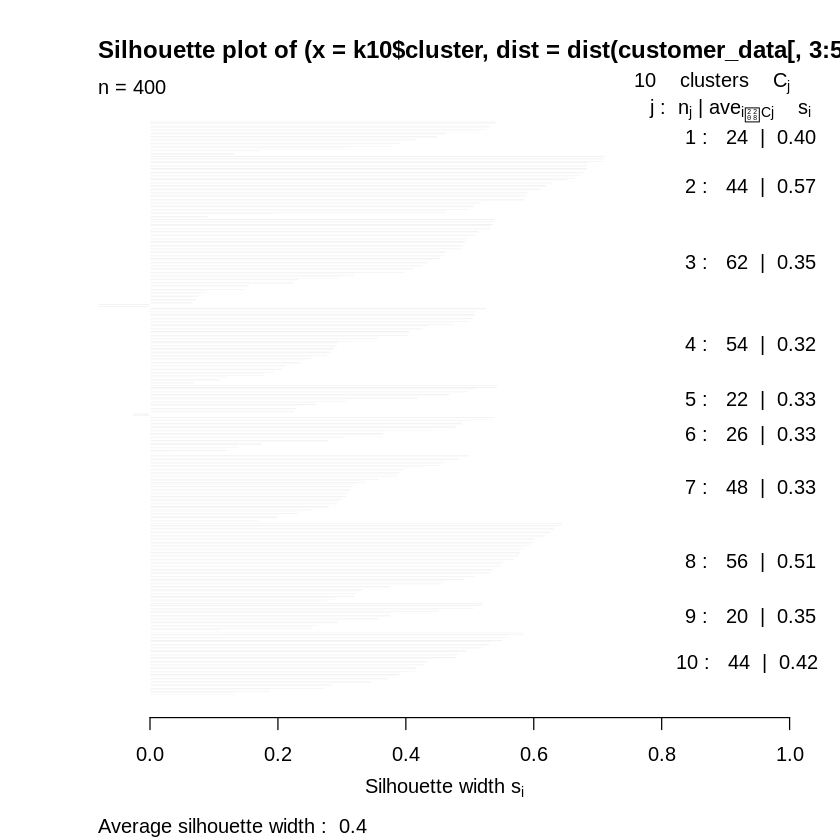

In [41]:
k10<-kmeans(customer_data[,3:5],10,iter.max=100,nstart=50,algorithm="Lloyd")
s10<-plot(silhouette(k10$cluster,dist(customer_data[,3:5],"euclidean")))

In [42]:
library(NbClust)

In [43]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



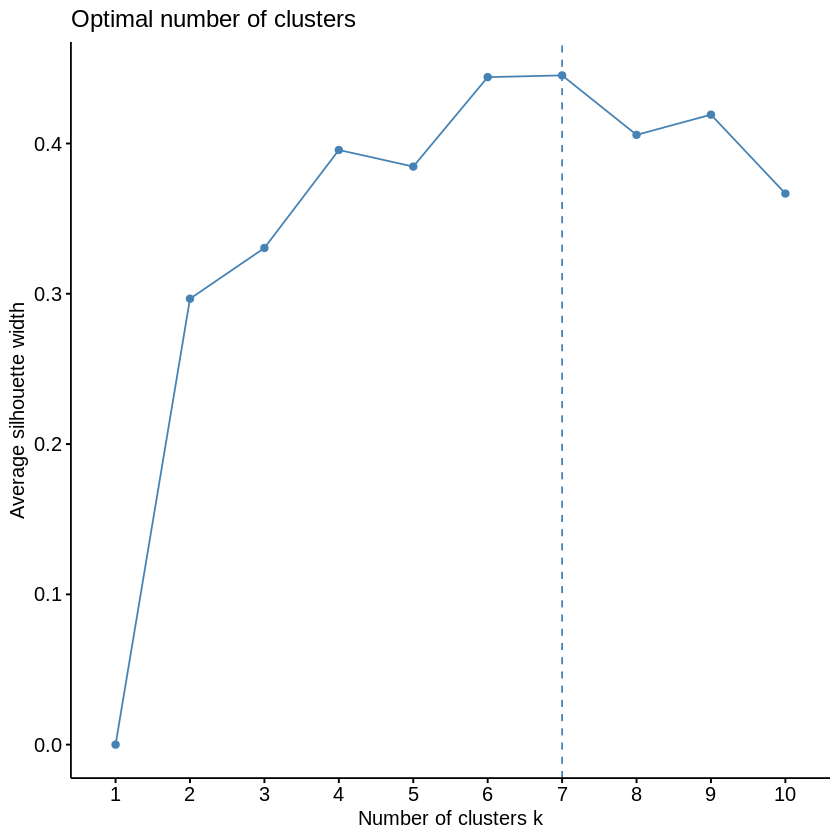

In [44]:
fviz_nbclust(customer_data[,3:5], kmeans, method = "silhouette")

In [45]:
set.seed(125)
stat_gap <- clusGap(customer_data[,3:5], FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)

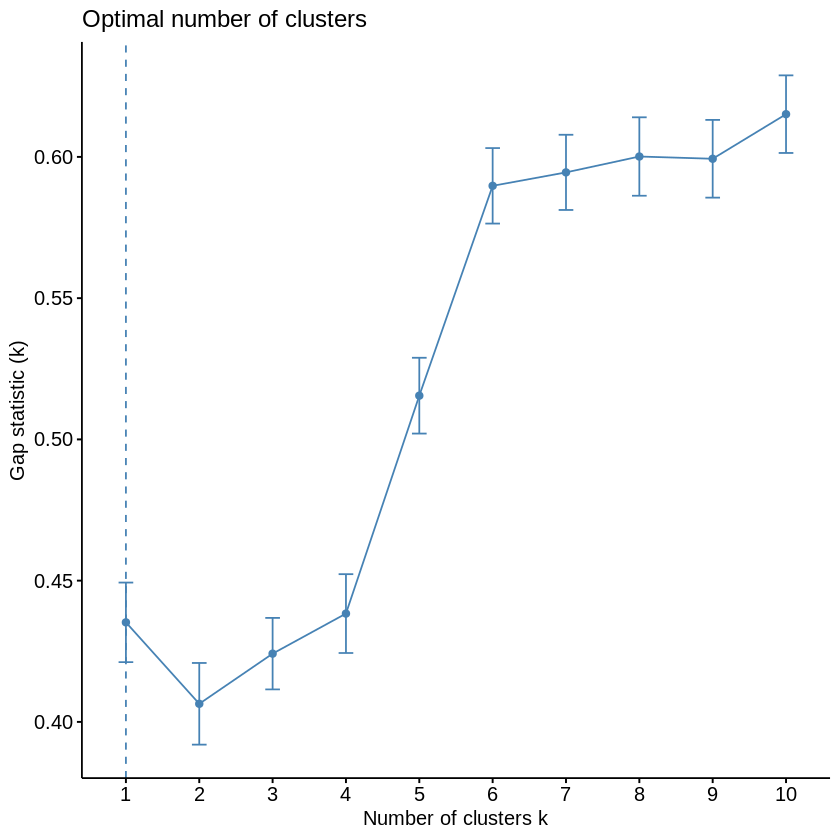

In [46]:
fviz_gap_stat(stat_gap)

In [47]:
k6<-kmeans(customer_data[,3:5],6,iter.max=100,nstart=50,algorithm="Lloyd")
k6

K-means clustering with 6 clusters of sizes 90, 76, 44, 78, 70, 42

Cluster means:
       Age Annual.Income..k.. Spending.Score..1.100.
1 56.15556           53.37778               49.08889
2 27.00000           56.65789               49.13158
3 25.27273           25.72727               79.36364
4 32.69231           86.53846               82.12821
5 41.68571           88.22857               17.28571
6 44.14286           25.14286               19.52381

Clustering vector:
  [1] 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6
 [38] 3 6 3 1 3 1 2 6 3 1 2 2 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 1 1 1 1
 [75] 1 2 1 2 2 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 2 2 1 2 1 2 2 1 1 2 1 2 1 1 1 1 1
[112] 2 2 2 2 2 1 1 1 1 2 2 2 4 2 4 5 4 5 4 5 4 2 4 5 4 5 4 5 4 5 4 2 4 5 4 5 4
[149] 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
[186] 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3
[223] 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 6 3 1 3 

In [48]:
pcclust=prcomp(customer_data[,3:5],scale=FALSE) #principal component analysis
summary(pcclust)

Importance of components:
                           PC1     PC2     PC3
Standard deviation     26.4293 26.1269 12.9155
Proportion of Variance  0.4512  0.4410  0.1078
Cumulative Proportion   0.4512  0.8922  1.0000

In [49]:
pcclust$rotation[,1:2]

,PC1,PC2
Age,0.1889742,-0.1309652
Annual.Income..k..,-0.5886410,-0.8083757
Spending.Score..1.100.,-0.7859965,0.5739136


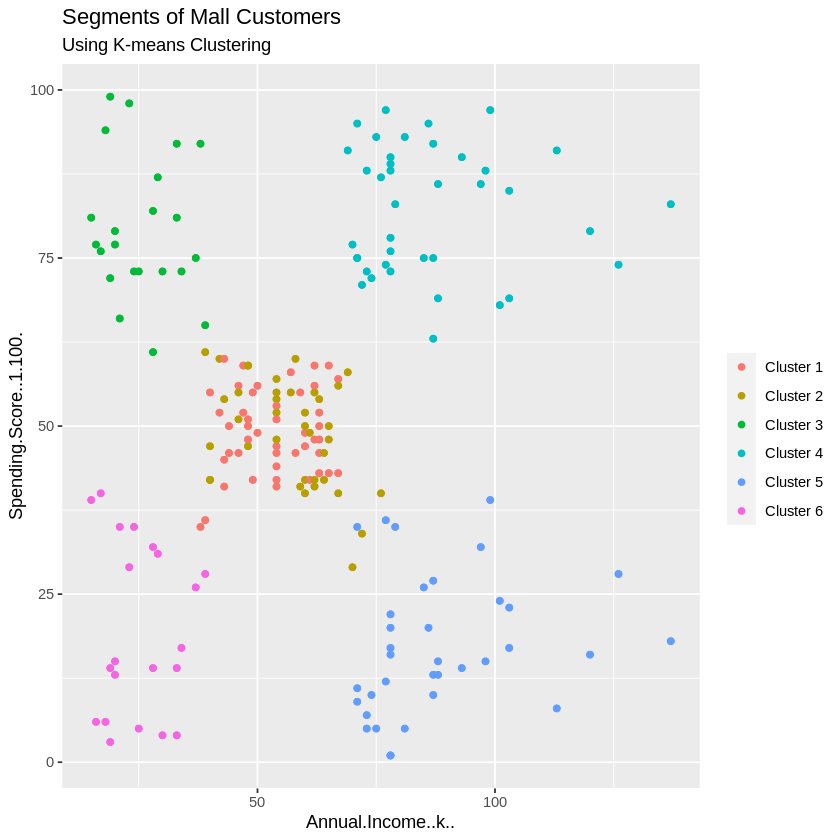

In [50]:
set.seed(1)
ggplot(customer_data, aes(x =Annual.Income..k.., y = Spending.Score..1.100.)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

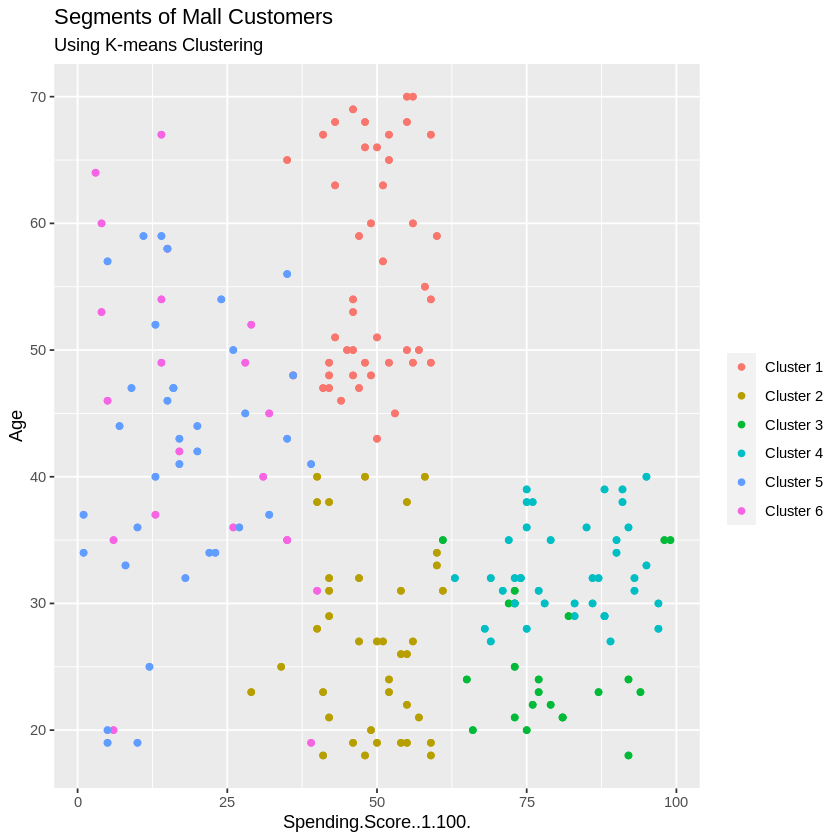

In [51]:
ggplot(customer_data, aes(x =Spending.Score..1.100., y =Age)) +
  geom_point(stat = "identity", aes(color = as.factor(k6$cluster))) +
  scale_color_discrete(name=" ",
                       breaks=c("1", "2", "3", "4", "5","6"),
                       labels=c("Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Cluster 5","Cluster 6")) +
  ggtitle("Segments of Mall Customers", subtitle = "Using K-means Clustering")

In [52]:
kCols=function(vec){cols=rainbow (length (unique (vec)))
return (cols[as.numeric(as.factor(vec))])}

In [53]:
digCluster<-k6$cluster; dignm<-as.character(digCluster);

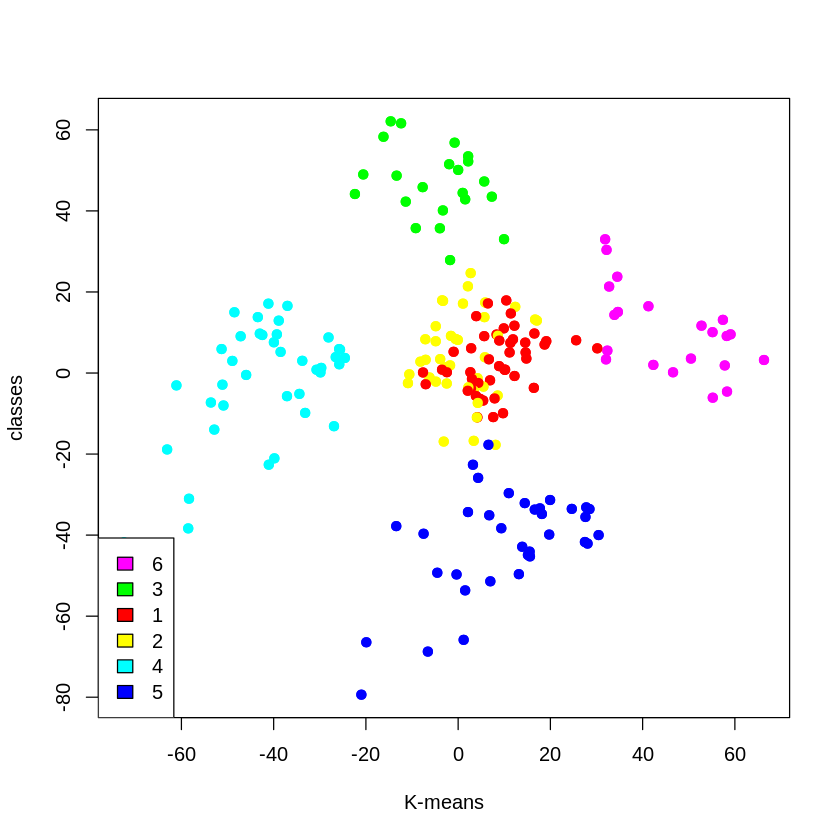

In [54]:
plot(pcclust$x[,1:2], col =kCols(digCluster),pch =19,xlab ="K-means",ylab="classes")
legend("bottomleft",unique(dignm),fill=unique(kCols(digCluster)))